In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

%load_ext autoreload

In [2]:
%autoreload
import sys
sys.path.insert(0, "../")

import pickle
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

from experiment_utils import plot_history, compare_histories
from rotation_rate_utils import plot_parameter_distances

/home/sicarbonnell/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
with open('adaptive_gradients.p','rb') as f:
    results = pickle.load(f)

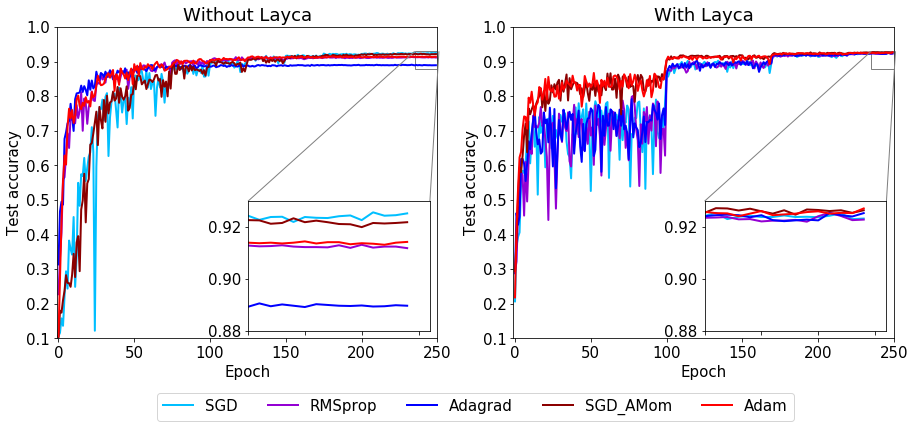

In [4]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 15})

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6.5))

colors = {'SGD':'deepskyblue','RMSprop':'darkviolet','Adagrad':'blue', 'SGD_AMom':'darkred','Adam':'red'}
title = {'normal':'Without Layca','llc':'With Layca'}

for training_mode, ax in zip(['normal','llc'],[ax1,ax2]):
    axins = zoomed_inset_axes(ax, 7.5, loc=4)
    axins.set_xlim(235, 251) 
    axins.set_ylim(0.88, 0.93) 
    mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5", lw=1.)
    
    for optimizer in ['SGD','RMSprop','Adagrad','SGD_AMom','Adam']:
        history = results[optimizer][training_mode]['history']
        ax.plot(history['epoch'],history['history']['val_acc'], color = colors[optimizer], linewidth = 2., label = optimizer)
        
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 ,
                         box.width, box.height * 1.])
        
        ax.set_ylim(0.1,1.)
#         ax.set_yticks()
        ax.set_xlim(-1,250)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Test accuracy')
        ax.set_title(title[training_mode])
        
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.025,
                         box.width, box.height * 0.975])
        
        axins.plot(history['epoch'],history['history']['val_acc'], color = colors[optimizer], linewidth = 2.)
        plt.setp(axins.get_xticklabels(), visible=False)



ax.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15),
          fancybox=True, ncol=5)

plt.savefig('figures/adaptive_validation.eps',format='eps', dpi=200)
# plt.savefig('figures/adaptive_validation.png',format='png', dpi=300)

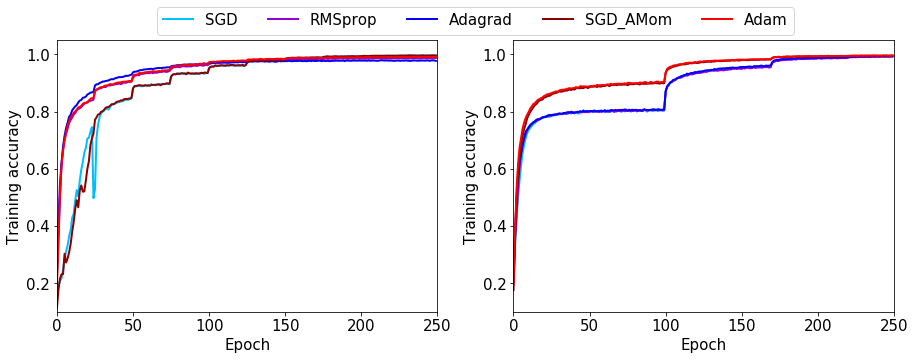

In [6]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 15})

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
colors = {'SGD':'deepskyblue','RMSprop':'darkviolet','Adagrad':'blue', 'SGD_AMom':'darkred','Adam':'red'}

for training_mode, ax in zip(['normal','llc'],[ax1,ax2]):
    for optimizer in ['SGD','RMSprop','Adagrad','SGD_AMom','Adam']:
        history = results[optimizer][training_mode]['history']
        ax.plot(history['epoch'],history['history']['acc'], color = colors[optimizer], linewidth = 2., label = optimizer)
        
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 ,
                         box.width, box.height * 1.])

        ax.set_ylim(0.1,1.05)
        ax.set_xlim(0,250)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Training accuracy')
        
ax.legend(loc='upper center', bbox_to_anchor=(-0.1, 1.15),
          fancybox=True, ncol=5)

plt.savefig('figures/adaptive_training.eps',format='eps', dpi=200)

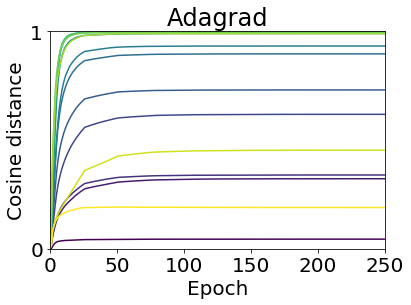

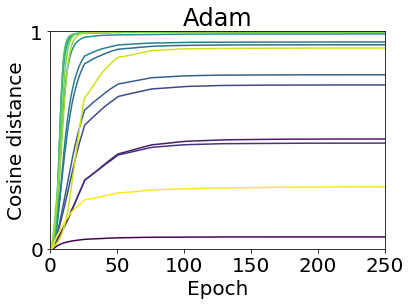

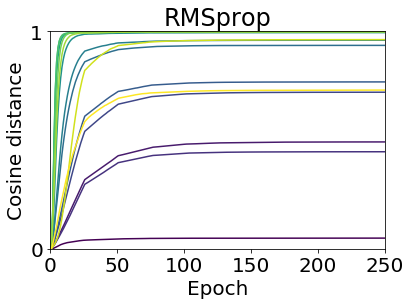

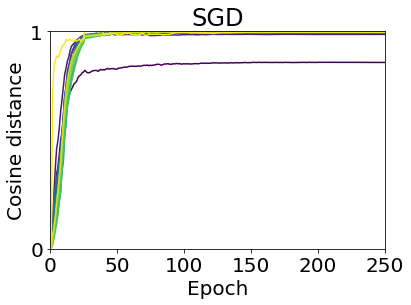

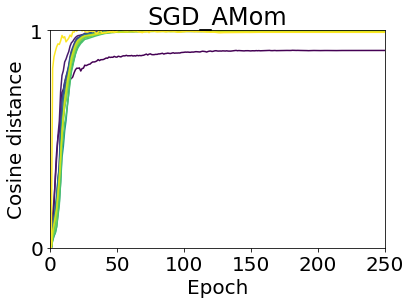

In [5]:
# plots and saves the angle deviation plots of the different methods
training_mode = 'normal'
for optimizer in sorted(results.keys()):
    plt.figure()
    plot_parameter_distances(results[optimizer][training_mode]['lpdm'])
    plt.title(optimizer)
    plt.savefig('figures/adaptive_angleDev_'+optimizer+'.eps',format='eps', dpi=200)

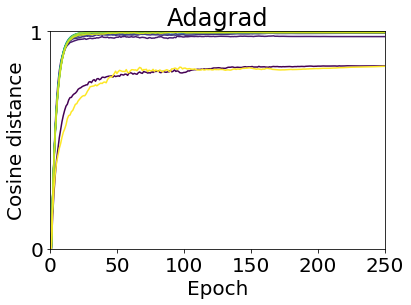

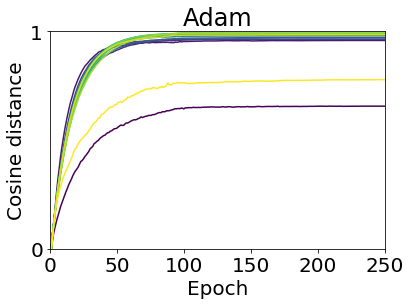

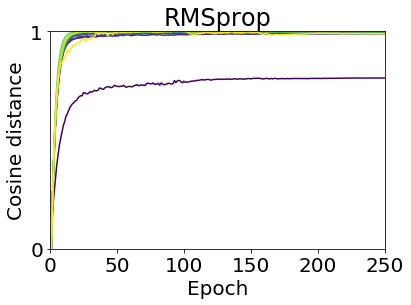

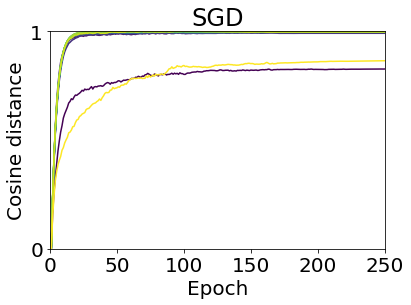

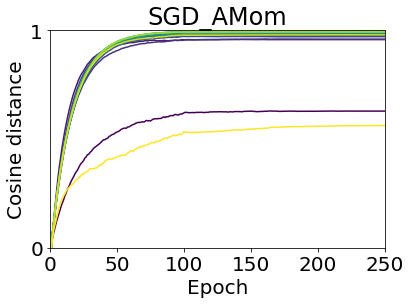

In [4]:
# plots the angle deviation plots of the different methods when Layca is applied
training_mode = 'llc'
for optimizer in sorted(results.keys()):
    plt.figure()
    plot_parameter_distances(results[optimizer][training_mode]['lpdm'])
    plt.title(optimizer)